<a href="https://colab.research.google.com/github/kresensiakatrin/UAS-Data-Mining/blob/main/kMedoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Data**

In [2]:
url='https://raw.githubusercontent.com/kresensiakatrin/UAS-Data-Mining/main/Data_TSDN5.csv'
df = pd.read_csv(url,encoding='unicode_escape', sep=';')

# **Data Understanding**

In [3]:
#Screening Dataset

df.head()

,Kode_Kab_Kota,Kabupaten_Kota,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk
0,3204,Kabupaten Bandung,33900,33052,608,240,3,2538,2050
1,3217,Kabupaten Bandung Barat,19155,18787,265,103,2,1401,1370
2,3216,Kabupaten Bekasi,51201,50561,539,101,8,4538,2541
3,3201,Kabupaten Bogor,47782,47512,206,64,9,5372,2002
4,3207,Kabupaten Ciamis,15140,14717,311,112,1,1337,869


In [4]:
df.tail()

,Kode_Kab_Kota,Kabupaten_Kota,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk
22,3277,Kota Cimahi,11900,11630,178,92,2,1781,14474
23,3274,Kota Cirebon,12812,12262,522,28,2,1670,8921
24,3276,Kota Depok,105089,102751,2139,199,9,4687,10267
25,3272,Kota Sukabumi,9205,8884,283,38,1,1410,7178
26,3278,Kota Tasikmalaya,13872,13283,541,48,1,1587,4173


In [5]:
df.shape

(27, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Kode_Kab_Kota         27 non-null     int64 
 1   Kabupaten_Kota        27 non-null     object
 2   Konfirmasi_total      27 non-null     int64 
 3   Konfirmasi_sembuh     27 non-null     int64 
 4   Konfirmasi_meninggal  27 non-null     int64 
 5   Konfirmasi_aktif      27 non-null     int64 
 6   Jumlah_RS_Rujukan     27 non-null     int64 
 7   Jumlah_nakes          27 non-null     int64 
 8   Kepadatan_Penduduk    27 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.0+ KB


In [7]:
#Drop Variables "Kode_Kab_Kota"

df2 = df.drop(["Kode_Kab_Kota"], axis = 1)

In [8]:
df.head()

,Kode_Kab_Kota,Kabupaten_Kota,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk
0,3204,Kabupaten Bandung,33900,33052,608,240,3,2538,2050
1,3217,Kabupaten Bandung Barat,19155,18787,265,103,2,1401,1370
2,3216,Kabupaten Bekasi,51201,50561,539,101,8,4538,2541
3,3201,Kabupaten Bogor,47782,47512,206,64,9,5372,2002
4,3207,Kabupaten Ciamis,15140,14717,311,112,1,1337,869


## **Data Pre - Processing**

###**Check Missing Value**

In [9]:
df.isnull().sum()

Kode_Kab_Kota           0
Kabupaten_Kota          0
Konfirmasi_total        0
Konfirmasi_sembuh       0
Konfirmasi_meninggal    0
Konfirmasi_aktif        0
Jumlah_RS_Rujukan       0
Jumlah_nakes            0
Kepadatan_Penduduk      0
dtype: int64



### **Check Duplicate Data**

In [10]:
df2.shape

(27, 8)

In [11]:
df2.drop_duplicates(inplace=True)

In [12]:
df2.shape

(27, 8)

### **Check Outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

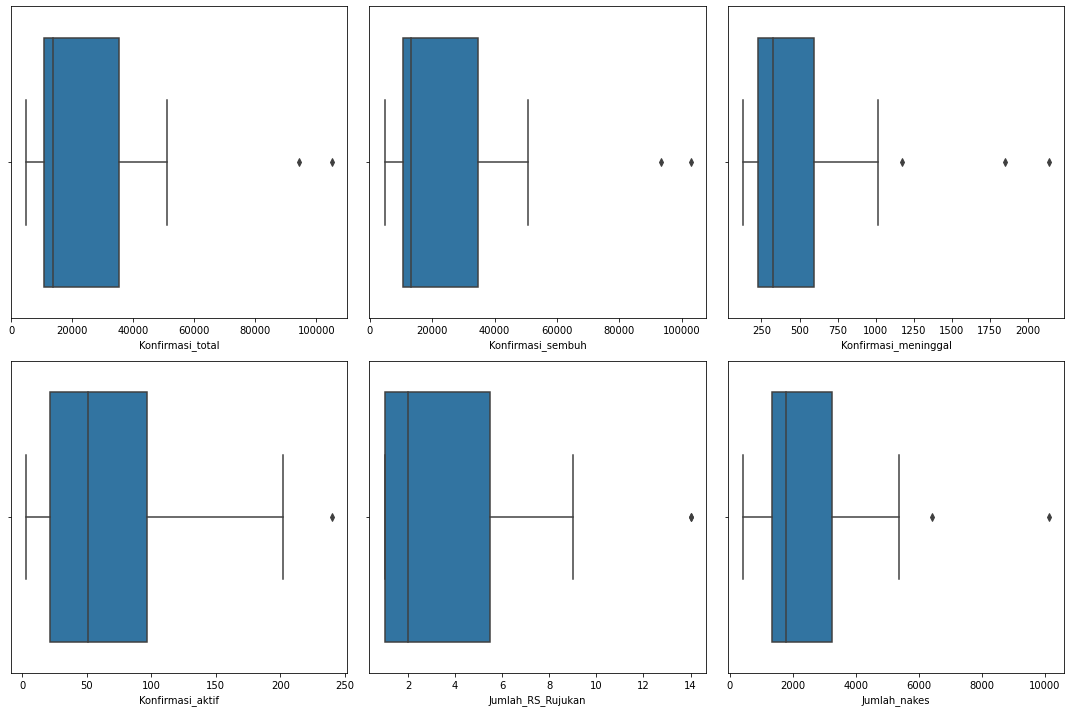

In [13]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.boxplot(df2['Konfirmasi_total'], ax = axs[0,0])
plt2 = sns.boxplot(df2['Konfirmasi_sembuh'], ax = axs[0,1])
plt3 = sns.boxplot(df2['Konfirmasi_meninggal'], ax = axs[0,2])
plt4 = sns.boxplot(df2['Konfirmasi_aktif'], ax = axs[1,0])
plt5 = sns.boxplot(df2['Jumlah_RS_Rujukan'], ax = axs[1,1])
plt6 = sns.boxplot(df2['Jumlah_nakes'], ax = axs[1,2])


plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


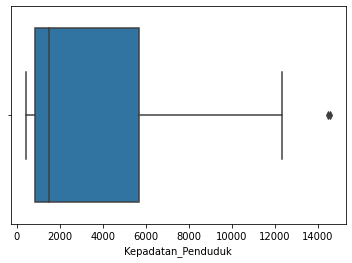

In [14]:
plt7 = sns.boxplot(df2['Kepadatan_Penduduk'])

## **Deskriptif Data**

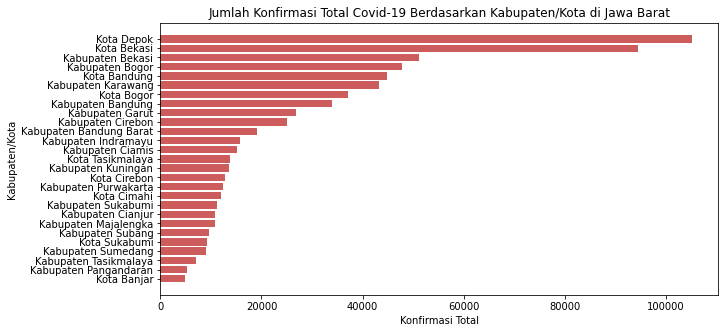

In [15]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df2.sort_values('Konfirmasi_total')['Kabupaten_Kota'], df2.sort_values('Konfirmasi_total')['Konfirmasi_total'],color='indianred')
plt.title('Jumlah Konfirmasi Total Covid-19 Berdasarkan Kabupaten/Kota di Jawa Barat')
plt.xlabel('Konfirmasi Total')
plt.ylabel('Kabupaten/Kota')
plt.show()

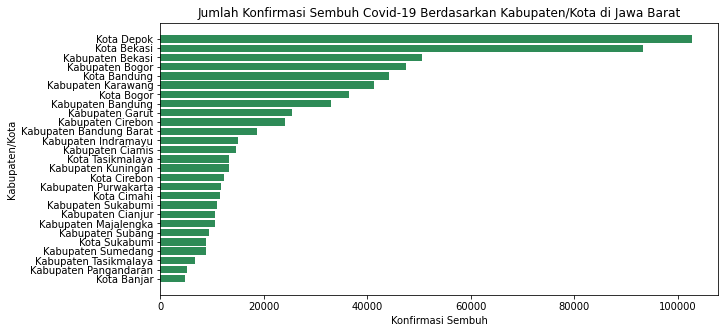

In [16]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df2.sort_values('Konfirmasi_sembuh')['Kabupaten_Kota'], df2.sort_values('Konfirmasi_sembuh')['Konfirmasi_sembuh'],color='seagreen')
plt.title('Jumlah Konfirmasi Sembuh Covid-19 Berdasarkan Kabupaten/Kota di Jawa Barat')
plt.xlabel('Konfirmasi Sembuh')
plt.ylabel('Kabupaten/Kota')
plt.show()

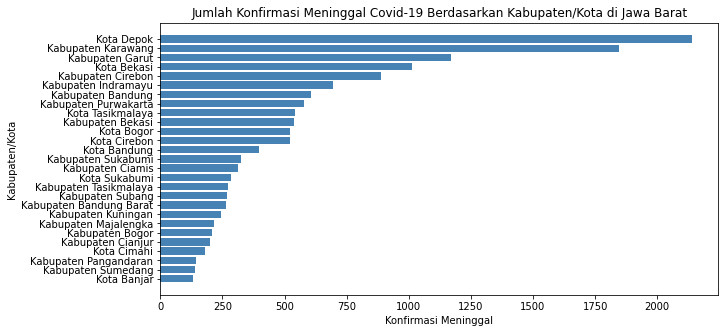

In [17]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df2.sort_values('Konfirmasi_meninggal')['Kabupaten_Kota'], df2.sort_values('Konfirmasi_meninggal')['Konfirmasi_meninggal'],color='steelblue')
plt.title('Jumlah Konfirmasi Meninggal Covid-19 Berdasarkan Kabupaten/Kota di Jawa Barat')
plt.xlabel('Konfirmasi Meninggal')
plt.ylabel('Kabupaten/Kota')
plt.show()

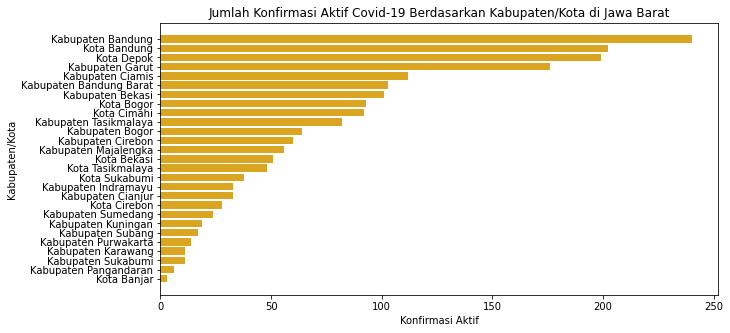

In [18]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df2.sort_values('Konfirmasi_aktif')['Kabupaten_Kota'], df2.sort_values('Konfirmasi_aktif')['Konfirmasi_aktif'],color='goldenrod')
plt.title('Jumlah Konfirmasi Aktif Covid-19 Berdasarkan Kabupaten/Kota di Jawa Barat')
plt.xlabel('Konfirmasi Aktif')
plt.ylabel('Kabupaten/Kota')
plt.show()

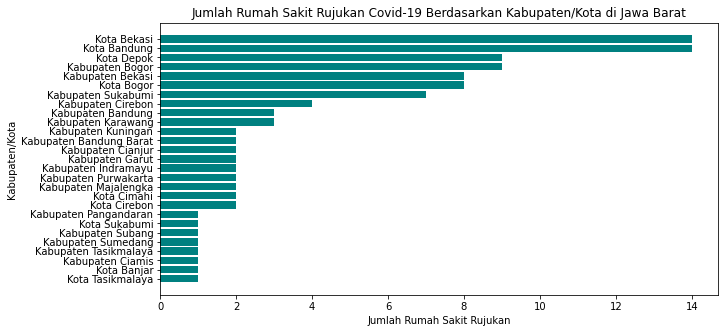

In [19]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df2.sort_values('Jumlah_RS_Rujukan')['Kabupaten_Kota'], df2.sort_values('Jumlah_RS_Rujukan')['Jumlah_RS_Rujukan'],color='teal')
plt.title('Jumlah Rumah Sakit Rujukan Covid-19 Berdasarkan Kabupaten/Kota di Jawa Barat')
plt.xlabel('Jumlah Rumah Sakit Rujukan')
plt.ylabel('Kabupaten/Kota')
plt.show()

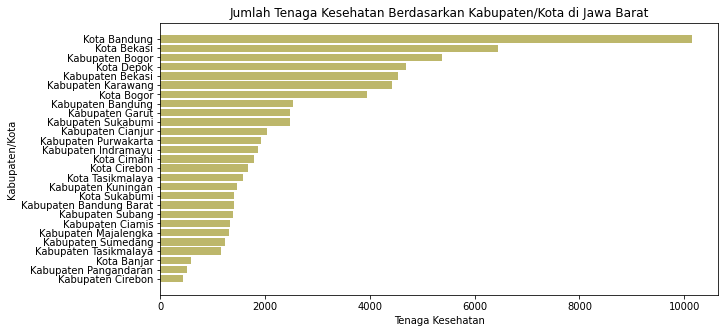

In [20]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df2.sort_values('Jumlah_nakes')['Kabupaten_Kota'], df2.sort_values('Jumlah_nakes')['Jumlah_nakes'],color='darkkhaki')
plt.title('Jumlah Tenaga Kesehatan Berdasarkan Kabupaten/Kota di Jawa Barat')
plt.xlabel('Tenaga Kesehatan')
plt.ylabel('Kabupaten/Kota')
plt.show()

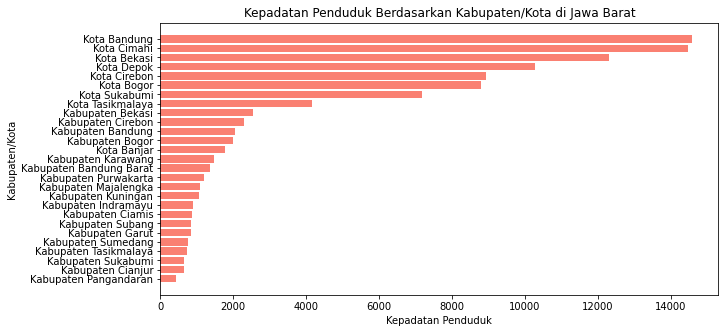

In [21]:
fig = plt.figure(figsize = (10, 5))

plt.barh(df2.sort_values('Kepadatan_Penduduk')['Kabupaten_Kota'], df2.sort_values('Kepadatan_Penduduk')['Kepadatan_Penduduk'],color='salmon')
plt.title('Kepadatan Penduduk Berdasarkan Kabupaten/Kota di Jawa Barat')
plt.xlabel('Kepadatan Penduduk')
plt.ylabel('Kabupaten/Kota')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


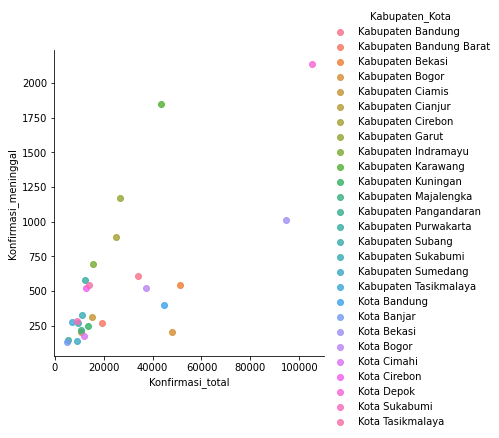

In [22]:
import seaborn as sns
sns.lmplot('Konfirmasi_total', 'Konfirmasi_meninggal', data=df2, hue='Kabupaten_Kota', fit_reg=False)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


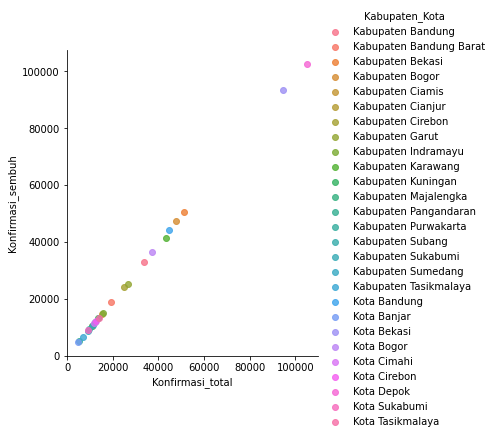

In [23]:
sns.lmplot('Konfirmasi_total', 'Konfirmasi_sembuh', data=df2, hue='Kabupaten_Kota', fit_reg=False)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


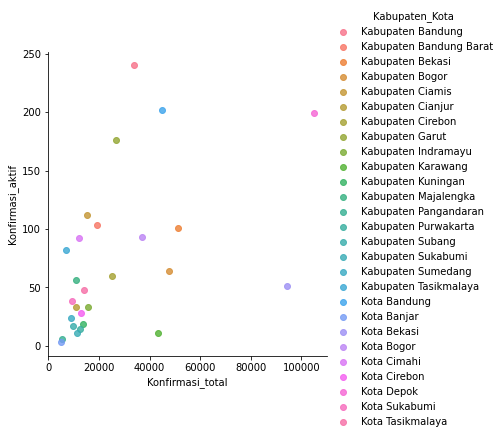

In [24]:
sns.lmplot('Konfirmasi_total', 'Konfirmasi_aktif', data=df2, hue='Kabupaten_Kota', fit_reg=False)

plt.show()

## **Standarisasi Data**

In [25]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
X = ['Konfirmasi_total','Konfirmasi_sembuh','Konfirmasi_meninggal','Konfirmasi_aktif','Jumlah_nakes','Jumlah_RS_Rujukan','Kepadatan_Penduduk']

# Scale these variables using 'fit_transform'
df[X] = scaler.fit_transform(df[X])

In [26]:
df2.head()

,Kabupaten_Kota,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk
0,Kabupaten Bandung,33900,33052,608,240,3,2538,2050
1,Kabupaten Bandung Barat,19155,18787,265,103,2,1401,1370
2,Kabupaten Bekasi,51201,50561,539,101,8,4538,2541
3,Kabupaten Bogor,47782,47512,206,64,9,5372,2002
4,Kabupaten Ciamis,15140,14717,311,112,1,1337,869


In [27]:
df3 = df.drop(["Kode_Kab_Kota"], axis = 1)

In [28]:
df3.head()

,Kabupaten_Kota,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk
0,Kabupaten Bandung,0.317433,0.312743,0.133438,2.623859,-0.230748,-0.027690,-0.405263
1,Kabupaten Bandung Barat,-0.274237,-0.268430,-0.566716,0.497291,-0.490339,-0.561645,-0.557504
2,Kabupaten Bekasi,1.011667,1.026079,-0.007409,0.466247,1.067209,0.911545,-0.295336
3,Kabupaten Bogor,0.874474,0.901859,-0.687151,-0.108082,1.326800,1.303206,-0.416010
4,Kabupaten Ciamis,-0.435346,-0.434246,-0.472818,0.636993,-0.749931,-0.591701,-0.669670


## **Clustering**

In [29]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.0 MB/s 


In [30]:
from sklearn_extra.cluster import KMedoids

In [31]:
X = df[['Konfirmasi_total','Konfirmasi_sembuh','Konfirmasi_meninggal','Konfirmasi_aktif','Jumlah_nakes','Jumlah_RS_Rujukan','Kepadatan_Penduduk']].values

Text(0.5, 1.0, 'Elbow curve')

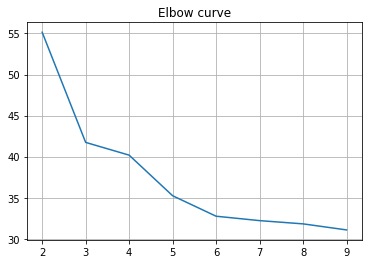

In [32]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmedoids = KMedoids(n_clusters=k).fit(X)
    distorsions.append(kmedoids.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

#### **Clustering dengan K = 3**

In [33]:

kmedoids = KMedoids(n_clusters=3, init='k-medoids++',random_state=0).fit(X)
kmedoids.labels_

array([2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 1, 0, 0])

In [34]:
#Add cluster result to Dataframe
df['cluster_3']=kmedoids.labels_
df

,Kode_Kab_Kota,Kabupaten_Kota,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk,cluster_3
0,3204,Kabupaten Bandung,0.317433,0.312743,0.133438,2.623859,-0.230748,-0.027690,-0.405263,2
1,3217,Kabupaten Bandung Barat,-0.274237,-0.268430,-0.566716,0.497291,-0.490339,-0.561645,-0.557504,0
2,3216,Kabupaten Bekasi,1.011667,1.026079,-0.007409,0.466247,1.067209,0.911545,-0.295336,2
3,3201,Kabupaten Bogor,0.874474,0.901859,-0.687151,-0.108082,1.326800,1.303206,-0.416010,2
4,3207,Kabupaten Ciamis,-0.435346,-0.434246,-0.472818,0.636993,-0.749931,-0.591701,-0.669670,0
5,3203,Kabupaten Cianjur,-0.607731,-0.601570,-0.697358,-0.589276,-0.490339,-0.267195,-0.719820,0
6,3209,Kabupaten Cirebon,-0.041020,-0.055272,0.704993,-0.170171,0.028843,-1.017174,-0.347949,0
7,3205,Kabupaten Garut,0.029844,0.000462,1.280631,1.630426,-0.490339,-0.054458,-0.675939,0
8,3212,Kabupaten Indramayu,-0.410668,-0.421698,0.315111,-0.589276,-0.490339,-0.346560,-0.662954,0
9,3215,Kabupaten Karawang,0.692458,0.652320,2.664611,-0.930768,-0.230748,0.859417,-0.533773,2


In [35]:
df[df.cluster_3 == 0].Kabupaten_Kota.values

array(['Kabupaten Bandung Barat', 'Kabupaten Ciamis', 'Kabupaten Cianjur',
       'Kabupaten Cirebon', 'Kabupaten Garut', 'Kabupaten Indramayu',
       'Kabupaten Kuningan', 'Kabupaten Majalengka',
       'Kabupaten Pangandaran', 'Kabupaten Purwakarta',
       'Kabupaten Subang', 'Kabupaten Sukabumi', 'Kabupaten Sumedang',
       'Kabupaten Tasikmalaya', 'Kota Banjar', 'Kota Cimahi',
       'Kota Cirebon', 'Kota Sukabumi', 'Kota Tasikmalaya'], dtype=object)

In [36]:
df[df.cluster_3 == 1].Kabupaten_Kota.values

array(['Kota Bandung', 'Kota Bekasi', 'Kota Depok'], dtype=object)

In [37]:
df[df.cluster_3 == 2].Kabupaten_Kota.values

array(['Kabupaten Bandung', 'Kabupaten Bekasi', 'Kabupaten Bogor',
       'Kabupaten Karawang', 'Kota Bogor'], dtype=object)

In [38]:
#See Characteristic of Cluster in each variables
hasil=df.groupby(['cluster_3']).agg({"Konfirmasi_total":"mean","Konfirmasi_sembuh":"mean","Konfirmasi_meninggal":"mean",
                                                 "Konfirmasi_aktif":"mean","Jumlah_RS_Rujukan":"mean","Jumlah_nakes":"mean","Kepadatan_Penduduk":"mean"}).reset_index()
hasil

,cluster_3,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk
0,0,-0.527154,-0.528090,-0.315211,-0.321310,-0.504002,-0.526646,-0.272724
1,1,2.224554,2.229246,1.308528,1.237192,2.192105,2.110008,1.908578
2,2,0.668454,0.669195,0.412684,0.478665,0.599945,0.735250,-0.108796


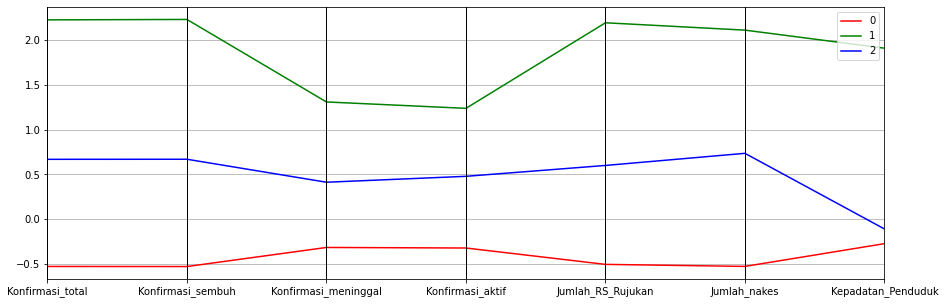

In [39]:
fig = plt.figure(figsize = (15, 5))

hasil['cluster_3'] = hasil.index
pd.plotting.parallel_coordinates(hasil, 'cluster_3', color=('r', 'g','b'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


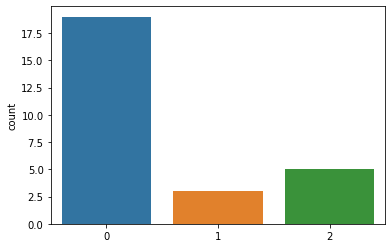

In [40]:
# Hasil clusteringnya
C_km = kmedoids.predict(X)
p= sns.countplot(C_km)

In [41]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.p

import umap

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 30.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=02917501b3a7f2984abae5deaeb5484c828c2d5e6e776bee136cc387a54379c7
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=3cf7a1bae36b73edcf78203da32a336ad9a28465e48bb136c95b326fe1f1f6fe
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
--2021-12-19 17:50:10--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


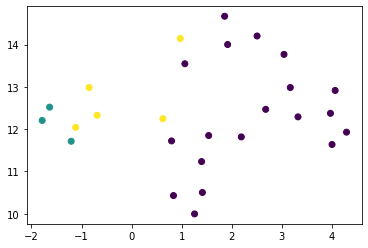

In [42]:
random_state=99

X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

### **Clustering dengan k = 4**

In [43]:
kmedoids2 = KMedoids(n_clusters=4, init='k-medoids++',random_state=0).fit(X)
kmedoids2.labels_

array([2, 0, 3, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3,
       0, 0, 1, 0, 0])

In [44]:
#Add cluster result to Dataframe
df['cluster_4']=kmedoids2.labels_
df

,Kode_Kab_Kota,Kabupaten_Kota,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk,cluster_3,cluster_4
0,3204,Kabupaten Bandung,0.317433,0.312743,0.133438,2.623859,-0.230748,-0.027690,-0.405263,2,2
1,3217,Kabupaten Bandung Barat,-0.274237,-0.268430,-0.566716,0.497291,-0.490339,-0.561645,-0.557504,0,0
2,3216,Kabupaten Bekasi,1.011667,1.026079,-0.007409,0.466247,1.067209,0.911545,-0.295336,2,3
3,3201,Kabupaten Bogor,0.874474,0.901859,-0.687151,-0.108082,1.326800,1.303206,-0.416010,2,3
4,3207,Kabupaten Ciamis,-0.435346,-0.434246,-0.472818,0.636993,-0.749931,-0.591701,-0.669670,0,0
5,3203,Kabupaten Cianjur,-0.607731,-0.601570,-0.697358,-0.589276,-0.490339,-0.267195,-0.719820,0,0
6,3209,Kabupaten Cirebon,-0.041020,-0.055272,0.704993,-0.170171,0.028843,-1.017174,-0.347949,0,0
7,3205,Kabupaten Garut,0.029844,0.000462,1.280631,1.630426,-0.490339,-0.054458,-0.675939,0,2
8,3212,Kabupaten Indramayu,-0.410668,-0.421698,0.315111,-0.589276,-0.490339,-0.346560,-0.662954,0,0
9,3215,Kabupaten Karawang,0.692458,0.652320,2.664611,-0.930768,-0.230748,0.859417,-0.533773,2,2


In [45]:
#See Characteristic of Cluster in each variables
hasil2=df.groupby(['cluster_4']).agg({"Konfirmasi_total":"mean","Konfirmasi_sembuh":"mean","Konfirmasi_meninggal":"mean",
                                                 "Konfirmasi_aktif":"mean","Jumlah_RS_Rujukan":"mean","Jumlah_nakes":"mean","Kepadatan_Penduduk":"mean"}).reset_index()
hasil2

,cluster_4,Konfirmasi_total,Konfirmasi_sembuh,Konfirmasi_meninggal,Konfirmasi_aktif,Jumlah_RS_Rujukan,Jumlah_nakes,Kepadatan_Penduduk
0,0,-0.558099,-0.557454,-0.403869,-0.429740,-0.504761,-0.552879,-0.250323
1,1,2.224554,2.229246,1.308528,1.237192,2.192105,2.110008,1.908578
2,2,0.346578,0.321841,1.359560,1.107839,-0.317278,0.259090,-0.538325
3,3,0.777460,0.793637,-0.244877,0.233411,1.153739,0.948175,0.131685


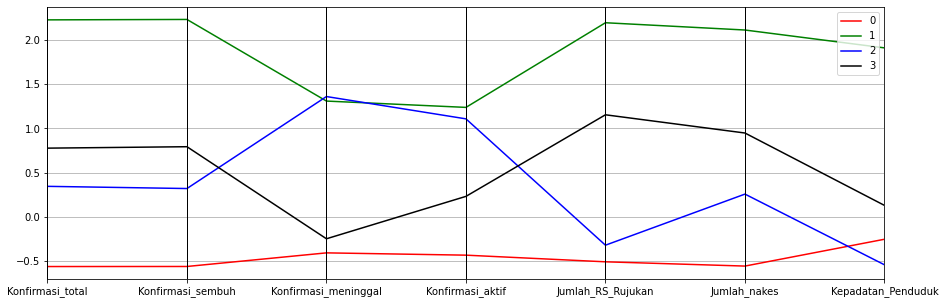

In [46]:
fig = plt.figure(figsize = (15, 5))

hasil2['cluster_4'] = hasil2.index
pd.plotting.parallel_coordinates(hasil2, 'cluster_4', color=('r', 'g','b','black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


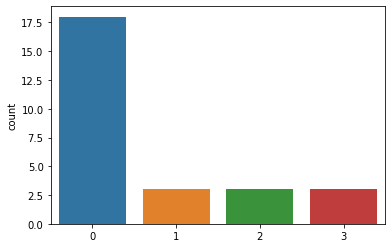

In [47]:
# Hasil clusteringnya
C_km2 = kmedoids2.predict(X)
p= sns.countplot(C_km2)

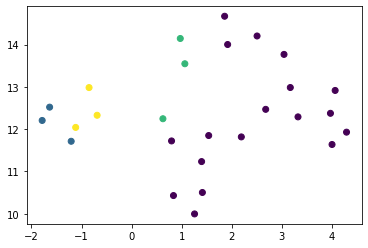

In [48]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km2)
plt.show()

In [49]:
df[df.cluster_4 == 0].Kabupaten_Kota.values

array(['Kabupaten Bandung Barat', 'Kabupaten Ciamis', 'Kabupaten Cianjur',
       'Kabupaten Cirebon', 'Kabupaten Indramayu', 'Kabupaten Kuningan',
       'Kabupaten Majalengka', 'Kabupaten Pangandaran',
       'Kabupaten Purwakarta', 'Kabupaten Subang', 'Kabupaten Sukabumi',
       'Kabupaten Sumedang', 'Kabupaten Tasikmalaya', 'Kota Banjar',
       'Kota Cimahi', 'Kota Cirebon', 'Kota Sukabumi', 'Kota Tasikmalaya'],
      dtype=object)

In [50]:
df[df.cluster_4 == 1].Kabupaten_Kota.values

array(['Kota Bandung', 'Kota Bekasi', 'Kota Depok'], dtype=object)

In [51]:
df[df.cluster_4 == 2].Kabupaten_Kota.values

array(['Kabupaten Bandung', 'Kabupaten Garut', 'Kabupaten Karawang'],
      dtype=object)

In [52]:
df[df.cluster_4 == 3].Kabupaten_Kota.values

array(['Kabupaten Bekasi', 'Kabupaten Bogor', 'Kota Bogor'], dtype=object)

### **Evaluasi**

Evaluasi Internal dengan Silouette Coefficient

In [53]:
from sklearn.metrics import silhouette_score as siluet

In [54]:
Hasil_Clustering = [C_km, C_km2]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')

0.3959119723317038, 0.4172980615756156, 